### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm

### Step 1 Decide Null and Alternate Hypothesis : 



$$ Null \ Hypothesis(Status \ Quo) : H_0 \ \implies \ \mu \geq 100 \ ms $$
$$ Alternate \ Hypothesis(Bold \ Claim) : H_1 \ \implies \ \mu  <  100 \ ms $$


### Step 2 Collect samples to compute test statistics :
$$ Samples(x) = [13, 12.9, 15.6, 13.6, 18.8, 12.2, 16.7, 16, 12.9, 18.4] $$
$$ n = 10 $$


In [47]:
l = [97, 90, 108, 110, 54, 87, 92, 103, 138, 96]


### Step 3 (Compute test statistics on the sample collected):
$$ \mu_\bar{x} = \frac{\sum_{i=0}^{n-1} x_i}{n} = 97.5 $$
$$ x \implies Samples $$

$$ S^2 = \frac{\sum_{i=0}^{n-1} (x_i - \mu_x)^2}{n} = 402.85 $$


$$ t \ score = \frac{\mu_x - \mu_\bar{x}}{S/\sqrt{n}} = 0.393 $$


In [51]:
sample_mean = sum(l) / len(l)
print(sample_mean)

97.5


In [52]:
s = 0
for i in l:
    s+=pow((i - sample_mean), 2)
sample_variance = s / len(l)
print('sample variance = '+ str(sample_variance))
sample_std = sample_variance ** 0.5
print('sample_std = ' +str(sample_std))
population_mean = 100
sample_size = len(l)
def t_score(pop_mean, sample_mean, sample_size, sample_std):
    
      numerator = pop_mean - sample_mean
      denominator = sample_std / (sample_size ** 0.5)
      return numerator / denominator

t_calculated = t_score(population_mean, sample_mean, sample_size, sample_std)
print('t_score = '+str(t_calculated)) 

sample variance = 402.85
sample_std = 20.07112353606544
t_score = 0.3938839864253414


### Step 4(Decide significance level) $\implies$
$$ Confidence = 95\% $$
$$ 1 - \alpha = 0.95 $$
$$ \alpha = 0.05 $$

In [53]:
alpha = 1 - 0.95
print(round(alpha, 2))

0.05


In [57]:
#Two tail test
t_critical = t.ppf(1-alpha, df=4)
print(t_critical)

2.13184678133629


### Step 5.1 (Apply decision Rule using t score)  
 1. In case of 2 tailed : $$ |t| > t_{{n - 1}, {\frac{\alpha}{2}} }   -----> Reject \ H_0, \ Accept \ H_1 $$
 2. In case of right tailed: $$ t > t_{{n-1}, {\alpha}}   -----> Reject \ H_0, \ Accept \ H_1 $$ 
 3. In case of left tailed  : $$ t < t_{{n-1}, \alpha}   -----> Reject \ H_0, \ Accept \ H_1 $$

Here we will use two tailed test : $$ |t| < t_{4, 0.025} \\ 0.013 < 2.131 \\ We \ Reject \ H_1 $$


In [59]:
if abs(t_calculated) < t_critical:
  print("Fail to reject Null Hypothesis")
else:
  print("Reject Null Hypothesis") 

Fail to reject Null Hypothesis



### Step 5.2 Apply decision Rule using p score:
1. For 2 tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(test \ statistic)) $$
2. For one tailed test $\implies$ $$ p \ value = (1 - cdf(test \ statistic)) $$

$$ if (p \ values < \alpha) : Reject \ H_0, \ Accept \ H_1 $$


Here we use two tailed test $\implies$ $$ p \ value = 2 * (1 - cdf(0.541)) \\ p \ value = 0.494 \\ p \ value > \alpha \\ We \ Reject \ H_1 $$

In [60]:
p_val = (1-norm.cdf(abs(t_calculated)))
print(p_val)

0.34683334682226064


In [61]:
if (p_val > alpha):
  print("Fail to reject Null Hypothesis")
else:
  print("Reject Null Hypothesis")

Fail to reject Null Hypothesis


Text(97.5, 0.0007, 'X_bar')

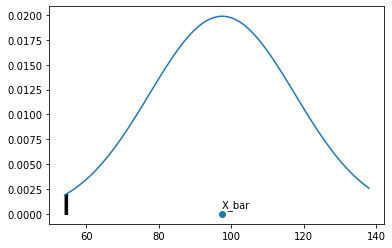

In [62]:
x_min = min(l)
x_max = max(l)
mean = sample_mean
std = sample_std

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)

t_critical_left = mean + (-1 * t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color="black")

plt.scatter(mean, 0)
plt.annotate("X_bar", (mean, 0.0007))